# Multiplier

In [2]:
from qiskit import *
import numpy as np
from math import pi, sqrt
import random

In [3]:
backend = Aer.get_backend('statevector_simulator')
def getBloch(quantumCircuit):
    return visualization.plot_bloch_multivector(execute(quantumCircuit, backend).result().get_statevector())

In [4]:
def stateGenerator(state):
    state = state[::-1]
    current = int(state, 2)
#     print('Current state: ', current)
    newState = [0 for i in range(0, 2**(len(state)))]
    newState[current] = 1
#     print('Init state array: ',newState)
    return newState

In [5]:
def getMeasure(quantumCircuit, n):
    measures = []
    for i in range(0,n):
        outcome = execute(quantumCircuit, backend).result()
        hist = outcome.get_counts()
        for i in hist.keys():
            measures.append(i)
        return measures

In [6]:
def makeCirc(n, m):
    initState = ''
    for i in range(0, n-m):
        initState += str(random.randint(0, 1))
    for i in range(0, m):
        initState += str(0)
    print(initState)
    qr = QuantumRegister(n)
    qc = ClassicalRegister(n)
    circ = QuantumCircuit(qr, qc)
    initializedState = stateGenerator(initState)
    circ.initialize(initializedState, qr)
    return circ

In [7]:
circ = makeCirc(4, 1)

1100


In [8]:
circ.csx(1, 3)
circ.cx(0, 1)
circ.csx(2, 3)
circ.csx(0, 3)
circ.cx(1, 2)
circ.crx(-pi/2, 2, 3)

for i in range(0, 4):
    circ.measure(i, i)

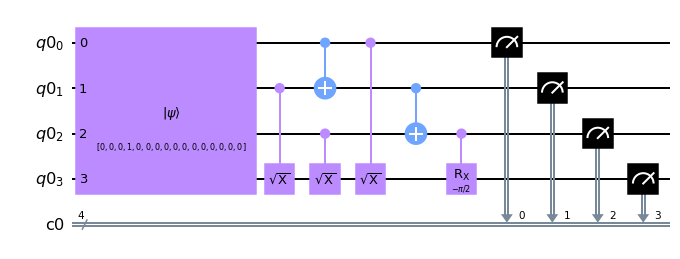

In [9]:
circ.draw();

In [10]:
getMeasure(circ, 1)[0][::-1]

'1001'

In [11]:
circ = QuantumCircuit(4)
circ.csx(1, 3)
circ.cx(0, 1)
circ.csx(2, 3)
circ.csx(0, 3)
circ.cx(1, 2)
circ.crx(-pi/2, 2, 3)

In [12]:
fullAdder = circ.to_gate(label=' Adder')

In [13]:
circ2 = QuantumCircuit(8)
circ2.append(fullAdder, [0, 1, 2, 3])

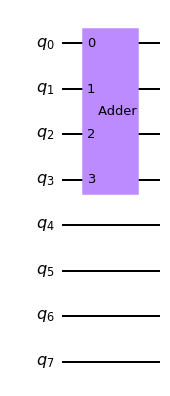

In [14]:
circ2.draw();

In [15]:
# Reverse bit
a = '01101'
a[::-1]

'10110'

In [16]:
def mult(a1, a2):
    qubits = len(a1) + len(a2) + 13
    qr = QuantumRegister(qubits)
    cr = ClassicalRegister(qubits)
    circuit = QuantumCircuit(qr, cr)
    initializedState = stateGenerator(a1[::-1] + a2[::-1] + '0000000000000')
    circuit.initialize(initializedState, qr)
    
    circuit.ccx(0, 2, 4)
    circuit.ccx(0, 3, 8)
    circuit.ccx(1, 2, 9)
    circuit.ccx(1, 3, 11)
    
    circuit.append(fullAdder, [4, 5, 6, 7])
    circuit.append(fullAdder, [8, 9, 7, 10])
    circuit.append(fullAdder, [11, 12, 10, 13])

    circuit.barrier()
    for i in range(0, qubits):
        circuit.measure(i, i)
    return circuit
    

In [41]:
a = '10'
b = '11'

In [42]:
circ = mult(a, b)

In [43]:
# getMeasure(circ, 1)[0][:-1]

In [44]:
def getResult(circ):
    result = getMeasure(circ, 1)[0][::-1]
    newResult = result[13] + result[10] + result[7] + result[6]
    return newResult

In [45]:
getResult(circ)

'0110'

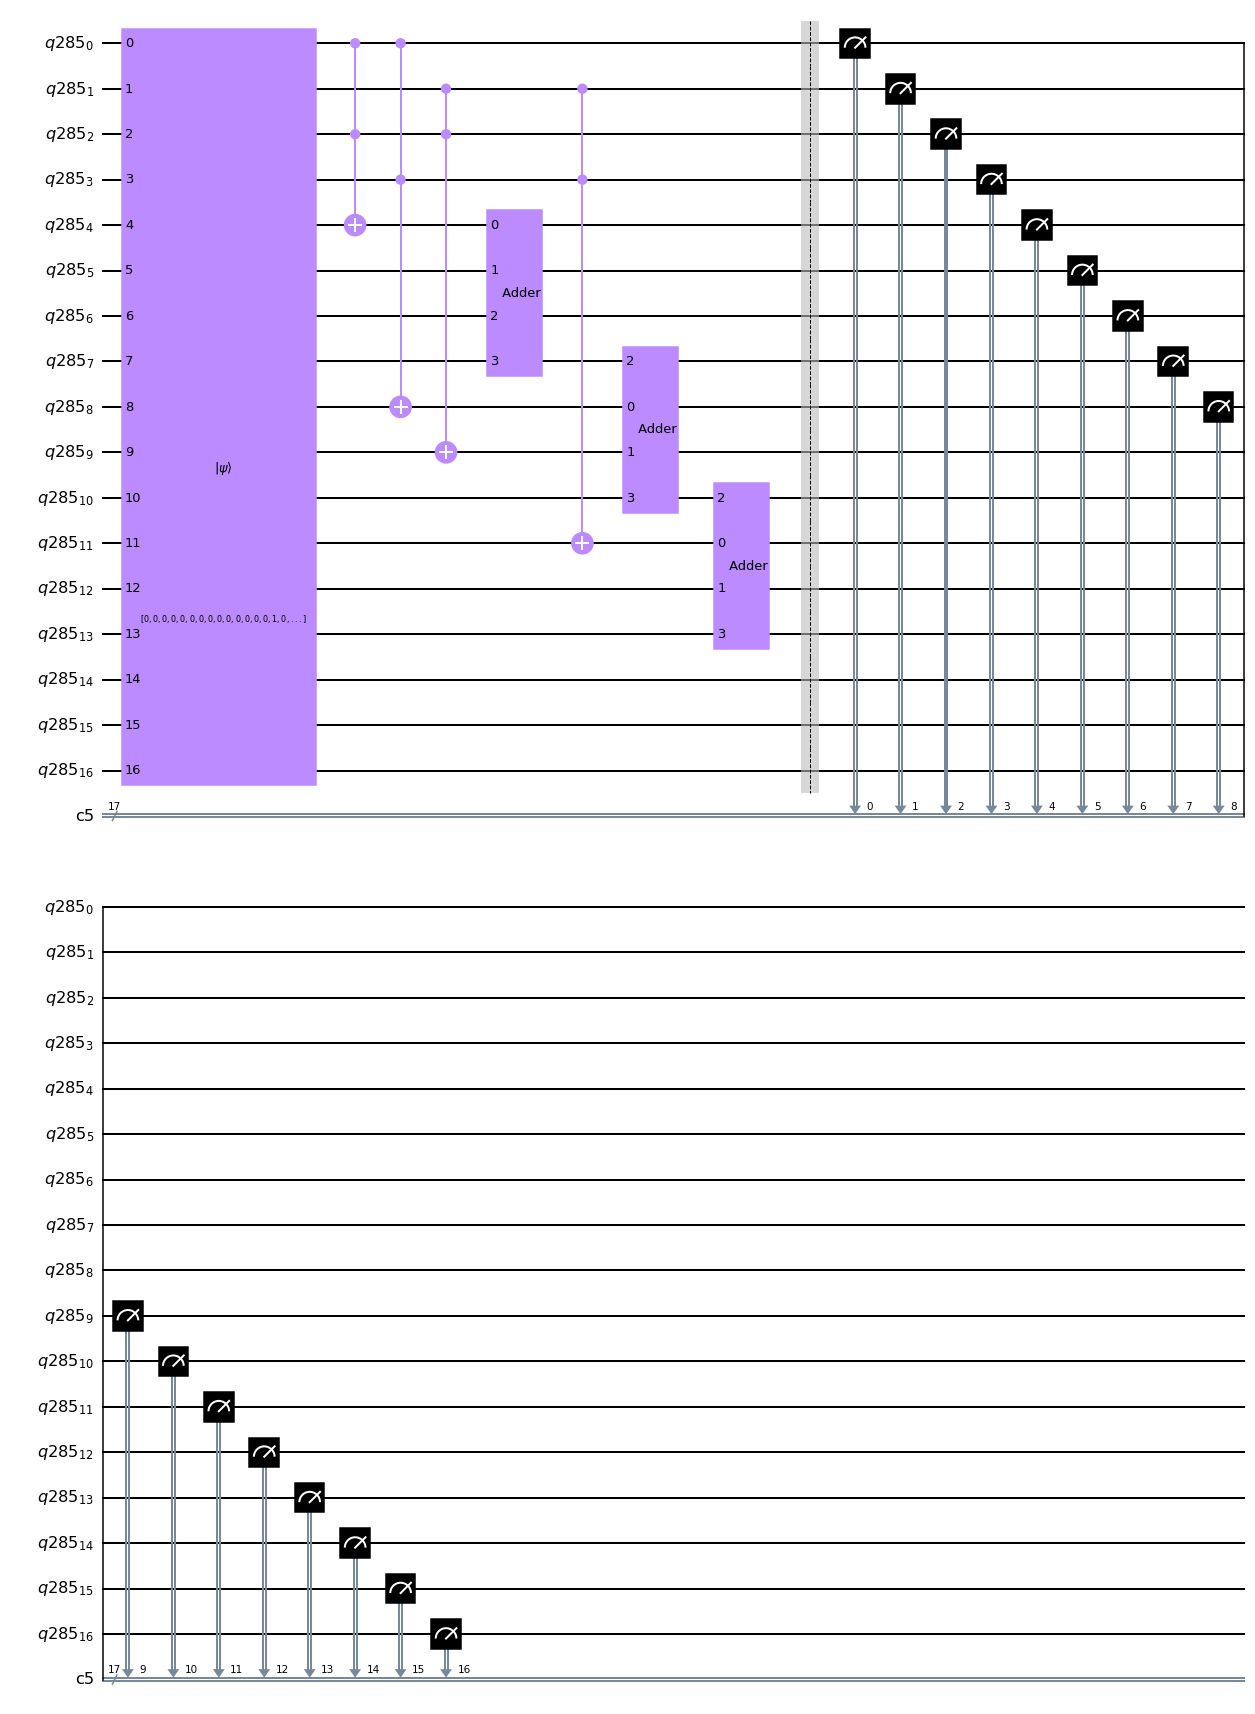

In [46]:
circ.draw();